In [1]:
%cd ../../..

/home/saplab/thaiminhpv/EFISS/AI-model-query-service


In [27]:
from transformers import ViTImageProcessor, ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import torch
import torch.nn as nn
import faiss

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.classifier = nn.Identity()
import torch
import numpy as np
# from torch.utils.data import Dataset, DataLoader
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import pandas as pd
df = pd.read_csv('data/shopee_crop_yolo/database.txt', sep=' ', nrows=10000, names=['img_path', 'label']).drop('label', axis=1)
df
from datasets import Dataset
dataset = Dataset.from_pandas(df)
dataset

Dataset({
    features: ['img_path'],
    num_rows: 10000
})

In [ ]:
# def tokenize_function(examples):
#     img = cv2.imread(examples["img_path"])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     inputs = processor(images=img, return_tensors="pt")
#     inputs['pixel_values'] = inputs['pixel_values'].squeeze()
#     return inputs
# tokenized_dataset = dataset.map(tokenize_function, batched=False, batch_size=100, writer_batch_size=100)
# tokenized_dataset = tokenized_dataset.remove_columns(['img_path'])
# # tokenized_dataset.save_to_disk("/media/saplab/MinhNVMe/relahash/temp/tokenized_dataset.hf")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# tokenized_dataset = tokenized_dataset.with_format("torch", device=device)
# dataloader = torch.utils.data.DataLoader(tokenized_dataset, batch_size=32, shuffle=False)
# model.eval()
# ...
# # logits.logits.shape

# # quantizer = faiss.IndexFlatL2(768)

# torch.save({
#     "embedding": embeddings
# }, '/media/saplab/MinhNVMe/relahash/temp/embeddings.pth')

In [4]:
embeddings = torch.load('/media/saplab/MinhNVMe/relahash/temp/embeddings.pth')['embedding']

In [5]:
embeddings.shape

torch.Size([10000, 768])

In [6]:
index = faiss.IndexFlatL2(768)
index.add(embeddings.numpy())

In [18]:
path = "/home/saplab/thaiminhpv/EFISS/AI-model-query-service/trainer/notebooks/646281ba614eb20545359b00_5_shopee_midori_m4u_crop0.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
inputs = processor(images=img, return_tensors="pt")
inputs['pixel_values'] = inputs['pixel_values'].to(device)
inputs

{'pixel_values': tensor([[[[ 0.6627,  0.6627,  0.6627,  ...,  0.6157,  0.6157,  0.6078],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.6157,  0.6078,  0.6078],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.6157,  0.6157,  0.6078],
          ...,
          [ 0.6627,  0.6627,  0.6627,  ...,  0.7098,  0.6000,  0.4588],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.6863,  0.5922,  0.4353],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.6784,  0.5686,  0.4039]],

         [[ 0.6314,  0.6314,  0.6314,  ...,  0.6235,  0.6235,  0.6157],
          [ 0.6314,  0.6314,  0.6314,  ...,  0.6235,  0.6157,  0.6157],
          [ 0.6314,  0.6314,  0.6314,  ...,  0.6235,  0.6235,  0.6157],
          ...,
          [ 0.6627,  0.6627,  0.6627,  ...,  0.3961,  0.2706,  0.0980],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.3804,  0.2471,  0.0902],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.3725,  0.2314,  0.0667]],

         [[ 0.6078,  0.6078,  0.6078,  ...,  0.5843,  0.5843,  0.5765],
          [ 0

In [19]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()
model.to(device)
with torch.no_grad():
    logits = model(**inputs).logits

In [22]:
logits.shape

torch.Size([1, 768])

In [24]:
D, I = index.search(logits.cpu().numpy(), 10)     # actual search

In [26]:
I

array([[1097, 8920, 2417, 9370, 4875, 3611, 6287,  459, 9717, 1273]])

data/shopee_crop_yolo/images/6460aafe52e365505c04bda2_1_shopee_22decembrestore_crop0.jpg


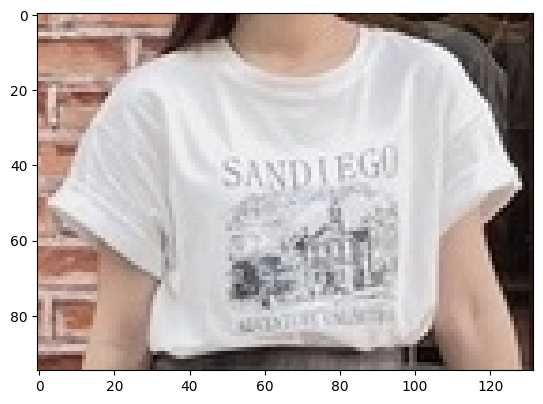

data/shopee_crop_yolo/images/6460c06b48de6f0ca36beb78_5_shopee_coolmate_vn_crop1.jpg


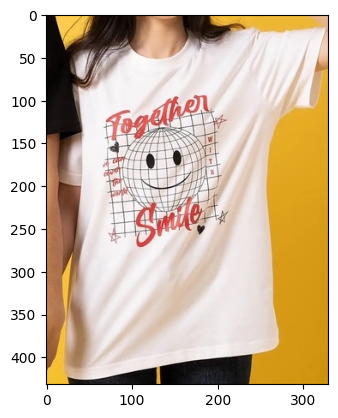

data/shopee_crop_yolo/images/6460aaf952e365505c04bd72_1_shopee_22decembrestore_crop0.jpg


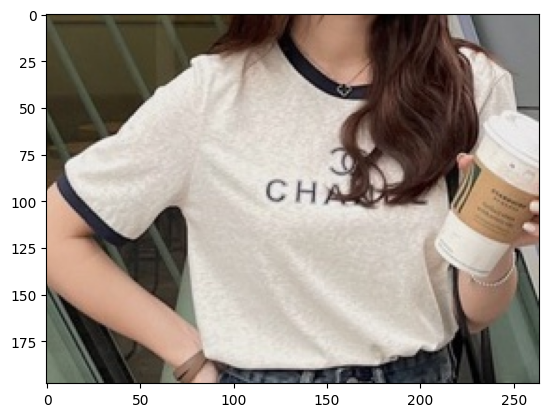

data/shopee_crop_yolo/images/6460c08148de6f0ca36bec1d_3_shopee_coolmate_vn_crop0.jpg


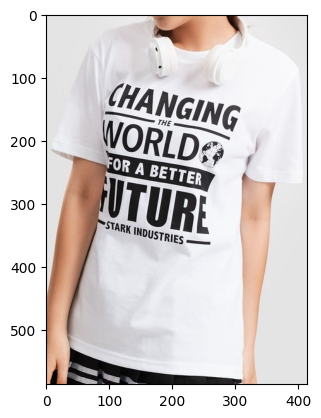

data/shopee_crop_yolo/images/6460ab3c52e365505c04c04c_5_shopee_coolmate_vn_crop1.jpg


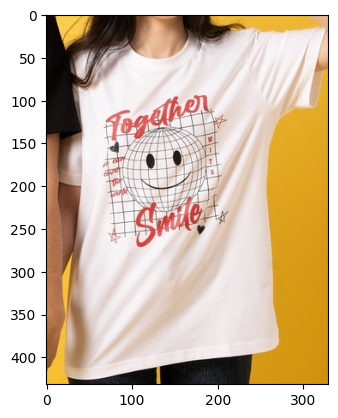

data/shopee_crop_yolo/images/6460ab1252e365505c04be54_2_shopee_thedelia_crop1.jpg


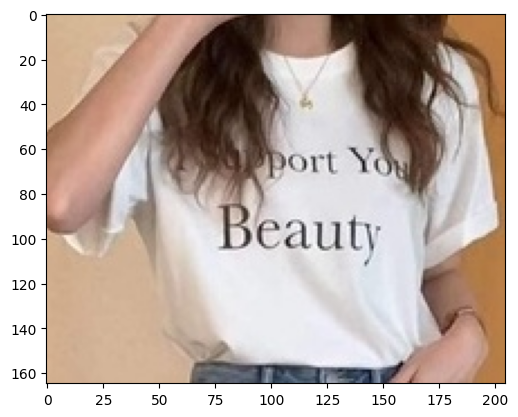

data/shopee_crop_yolo/images/6460c03748de6f0ca36be994_1_shopee_22decembrestore_crop0.jpg


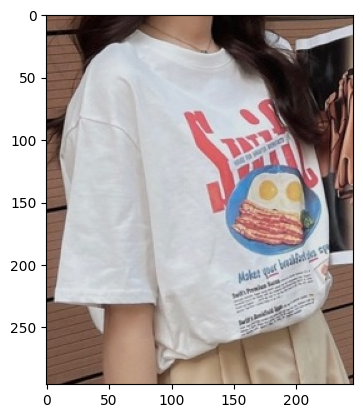

data/shopee_crop_yolo/images/6460aaf852e365505c04bd6c_1_shopee_22decembrestore_crop0.jpg


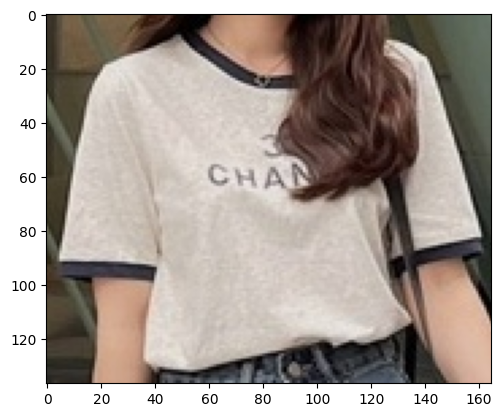

data/shopee_crop_yolo/images/6460c07d48de6f0ca36bebed_3_shopee_coolmate_vn_crop2.jpg


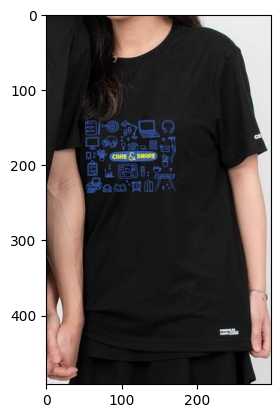

data/shopee_crop_yolo/images/6460aafa52e365505c04bd78_1_shopee_22decembrestore_crop0.jpg


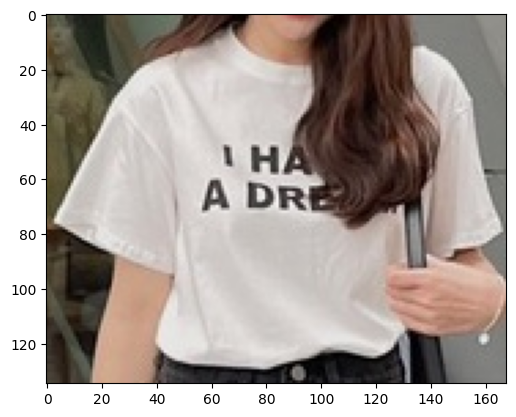

In [32]:
import matplotlib.pyplot as plt

for i in I[0]:
    file_path = df['img_path'].iloc[i]
    print(file_path)
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

torch.Size([1, 3, 224, 224])
torch.Size([1, 768])
data/shopee_crop_yolo/images/6460ab3252e365505c04bfe3_0_shopee_coolmate_vn_crop1.jpg
data/shopee_crop_yolo/images/6460ab3252e365505c04bfe3_5_shopee_coolmate_vn_crop0.jpg
data/shopee_crop_yolo/images/6460ab3252e365505c04bfe3_0_shopee_coolmate_vn_crop0.jpg
data/shopee_crop_yolo/images/6460ab2152e365505c04bef9_3_shopee_coolmate_vn_crop0.jpg
data/shopee_crop_yolo/images/6460ab3352e365505c04bfef_4_shopee_coolmate_vn_crop1.jpg
data/shopee_crop_yolo/images/6460ab6652e365505c04c1d8_2_shopee_coolmate_vn_crop8.jpg
data/shopee_crop_yolo/images/6460ab3252e365505c04bfe3_5_shopee_coolmate_vn_crop1.jpg
data/shopee_crop_yolo/images/6460ab6652e365505c04c1d8_2_shopee_coolmate_vn_crop12.jpg
data/shopee_crop_yolo/images/6460c05748de6f0ca36beabd_2_shopee_poloman_vn_crop0.jpg
data/shopee_crop_yolo/images/6460ab6652e365505c04c1d8_2_shopee_coolmate_vn_crop10.jpg


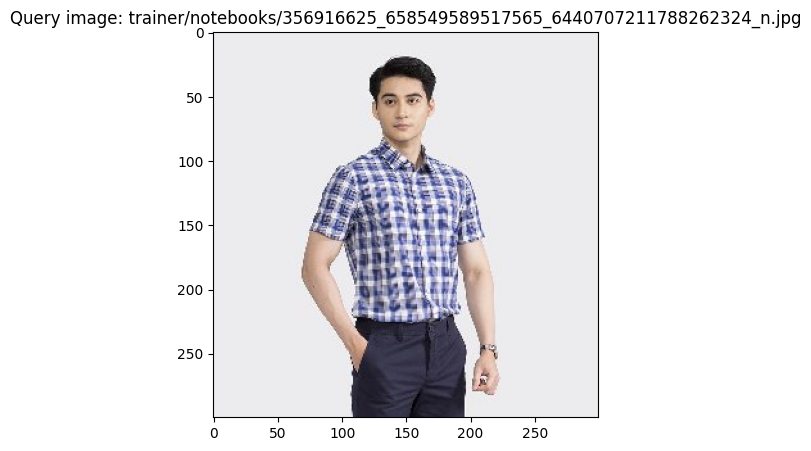

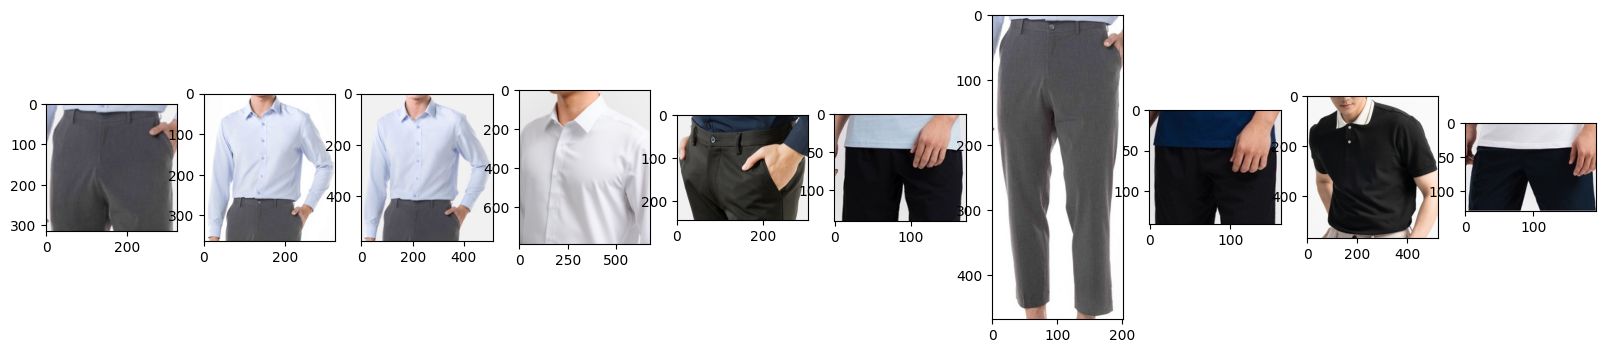

In [47]:
import matplotlib.pyplot as plt
path = "trainer/notebooks/356916625_658549589517565_6440707211788262324_n.jpg"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()
model.to(device)

def inference(path: str):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    inputs = processor(images=img, return_tensors="pt")
    inputs['pixel_values'] = inputs['pixel_values'].to(device)
    print(inputs['pixel_values'].shape)
    with torch.no_grad():
        logits = model(**inputs).logits
    print(logits.shape)
    D, I = index.search(logits.cpu().numpy(), 10)     # actual search

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title("Query image: " + path)
    plt.draw()

    plt.figure(figsize=(20, 20))
    plt.title("Result images")
    for i, e in enumerate(I[0]):
        plt.subplot(1, 10, i + 1)
        file_path = df['img_path'].iloc[e]
        print(file_path)
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.draw()
inference(path)